<a href="https://colab.research.google.com/github/vinkrishna/ExpandingSenses/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept of Feature Engineering

To bring the concept of feature engineering to life, let's embark on a coding adventure! Imagine you have a dataset filled with brain signals. Your task is to extract features such as frequency, amplitude, and time characteristics from the data. By using specific Python libraries and functions, you can apply feature engineering techniques and observe how these features reveal valuable information about the brain.

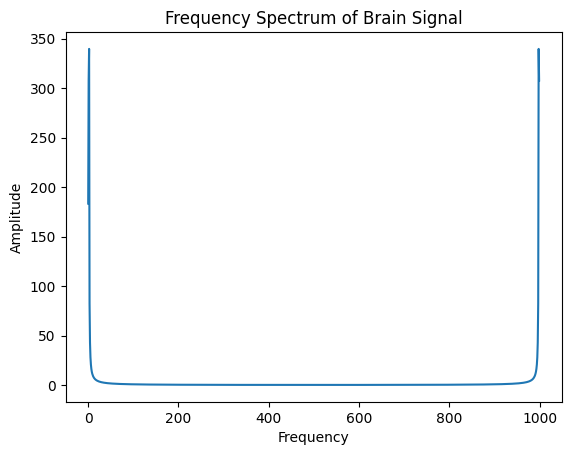

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Simulated brain signal data
brain_signal = np.sin(np.linspace(0, 10, 1000))

# Extracting frequency feature
frequency = fft(brain_signal)

# Plotting the frequency spectrum
plt.plot(abs(frequency))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Brain Signal')
plt.show()


By running this code, you have ploted the frequency spectrum of a simulated brain signal. The resulting plot will showcase the distribution of frequencies present in the signal, providing a glimpse into its unique characteristics.

Let's explore the same, with more complicated signal!

* Plotting the brain signal with specified x-axis (time series).

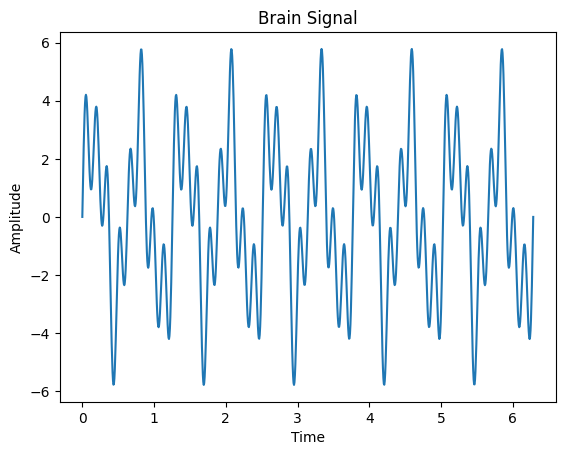

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Simulated brain signal data (more complicated)
frequencies = [10, 25, 40] # Frequency components to include in the signal
amplitudes = [3, 1, 2] # Amplitude of each frequency component
time_series = np.linspace(0, 2*np.pi, num=1000) # Time series (x-axis)
brain_signal = sum([amp * np.sin(freq * time_series) for freq, amp in zip(frequencies, amplitudes)])

# Extracting frequency feature using FFT
frequency = fft(brain_signal)

# Plotting the brain signal with specified x-axis (time series)
plt.figure() # Create a new figure to avoid overlapping old plots
plt.plot(time_series, brain_signal)  # Specify time series as the x-axis for plotting the brain signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Brain Signal')
plt.show()

This will give you a clearer visualization of how the signal varies over time. 📈👨‍💻

* Frequency Spectrum of Brain Signals

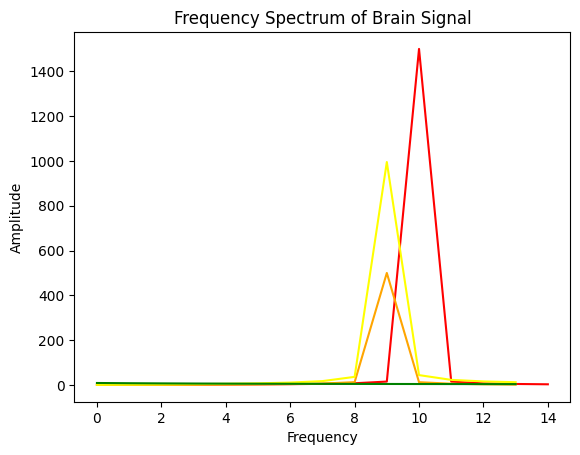

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Simulated brain signal data (more complicated)
frequencies = [10, 25, 40] # Frequency components to include in the signal
amplitudes = [3, 1, 2] # Amplitude of each frequency component
time_series = np.linspace(0, 2*np.pi, num=1000) # Time series (x-axis)
brain_signal = sum([amp * np.sin(freq * time_series) for freq, amp in zip(frequencies, amplitudes)])

# Extracting frequency feature using FFT
frequency = fft(brain_signal)

# Plotting the frequency spectrum with different colors for each frequency range
plt.figure() # Create a new figure to avoid overlapping old plots
plt.plot(abs(frequency[0:15]), color='red')  # Frequencies from 0-15 Hz (color: red)
plt.plot(abs(frequency[16:30]), color='orange')  # Frequencies from 16-30 Hz (color: orange)
plt.plot(abs(frequency[31:45]), color='yellow')  # Frequencies from 31-45 Hz (color: yellow)
plt.plot(abs(frequency[46:60]), color='green')  # Frequencies from 46-60 Hz (color: green)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Brain Signal')
plt.show()


In this code, We've added more frequency components to the signal (10 Hz, 25 Hz, and 40 Hz) with different amplitudes. The `frequencies` and `amplitudes` lists are used to generate a more complicated brain signal using summation of sinusoids.

The FFT is applied to the resulting signal, and each frequency range (0-15Hz, 16-30Hz, 31-45Hz, and 46-60Hz) is plotted with a different color to make it easier to visualize. This should give you a more visually appealing plot! Let me know if this works for you. 😊👨‍💻

## Feature Engineering: find features that distinguish between brain-activity during Happy or Sad emotion.

Experiment with different feature combinations to improve the accuracy of classifying emotions based on brain activity

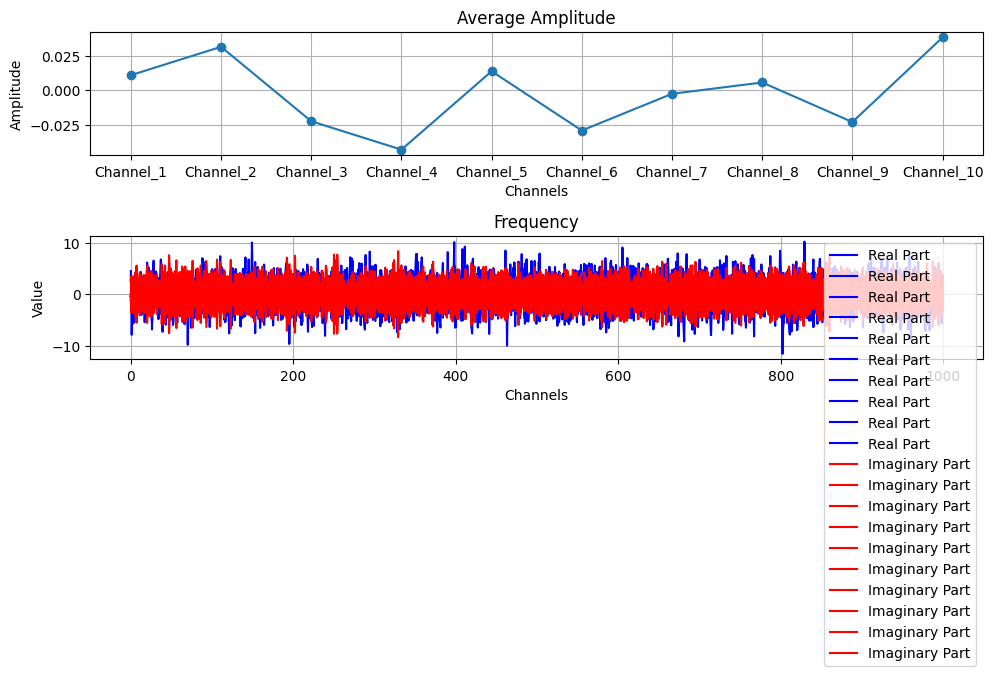

Average Amplitude:
Channel_1     0.010788
Channel_2     0.031292
Channel_3    -0.022542
Channel_4    -0.043075
Channel_5     0.013622
Channel_6    -0.029252
Channel_7    -0.002689
Channel_8     0.005495
Channel_9    -0.023104
Channel_10    0.038105
dtype: float64

Frequency:
[[ 4.48061112+0.j         -0.68296399-0.31505034j -1.19404538-1.28963552j
  ...  2.73040958-3.47289572j -1.19404538+1.28963552j
  -0.68296399+0.31505034j]
 [-7.90658235+0.j          1.08269821+0.88697447j -0.61956031-3.5627329j
  ... -0.92158634+0.85637346j -0.61956031+3.5627329j
   1.08269821-0.88697447j]
 [-2.21843565+0.j          2.46710648+0.6815594j   2.17275909-0.93678439j
  ...  0.57332916+1.3051495j   2.17275909+0.93678439j
   2.46710648-0.6815594j ]
 ...
 [ 0.21210652+0.j         -3.76755889-4.55139556j -0.42000968-2.69969359j
  ...  0.83698635+0.21318601j -0.42000968+2.69969359j
  -3.76755889+4.55139556j]
 [-5.66459366+0.j          0.51430108-3.02826548j -0.10821367-0.73379516j
  ... -1.01403045-2.6002606

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)

# Simulate brain activity data (e.g., EEG signals)
num_samples = 1000
num_channels = 10
brain_activity = np.random.randn(num_samples, num_channels)

# Simulated emotion labels (e.g., "happy" or "sad")
emotions = np.random.choice(["happy", "sad"], size=num_samples)

# Creating a pandas DataFrame to store the data
data = pd.DataFrame(brain_activity, columns=[f"Channel_{i+1}" for i in range(num_channels)])
data["Emotion"] = emotions

# Exploring the data and computing different features
average_amplitude = data.select_dtypes(include=[np.number]).mean()  # Select numeric columns only
frequency = np.fft.fft(brain_activity)

# Plotting the computed features
plt.figure(figsize=(10, 6))

# Plotting average amplitude
plt.subplot(2, 1, 1)
plt.plot(average_amplitude, marker='o')
plt.title('Average Amplitude')
plt.xlabel('Channels')
plt.ylabel('Amplitude')
plt.grid(True)

# Plotting frequency
plt.subplot(2, 1, 2)
plt.plot(frequency.real, color='b', label='Real Part')
plt.plot(frequency.imag, color='r', label='Imaginary Part')
plt.title('Frequency')
plt.xlabel('Channels')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Adjusting subplots spacing
plt.tight_layout()

# Displaying the plot
plt.show()


# Printing the computed features
print("Average Amplitude:")
print(average_amplitude)
print("\nFrequency:")
print(frequency)

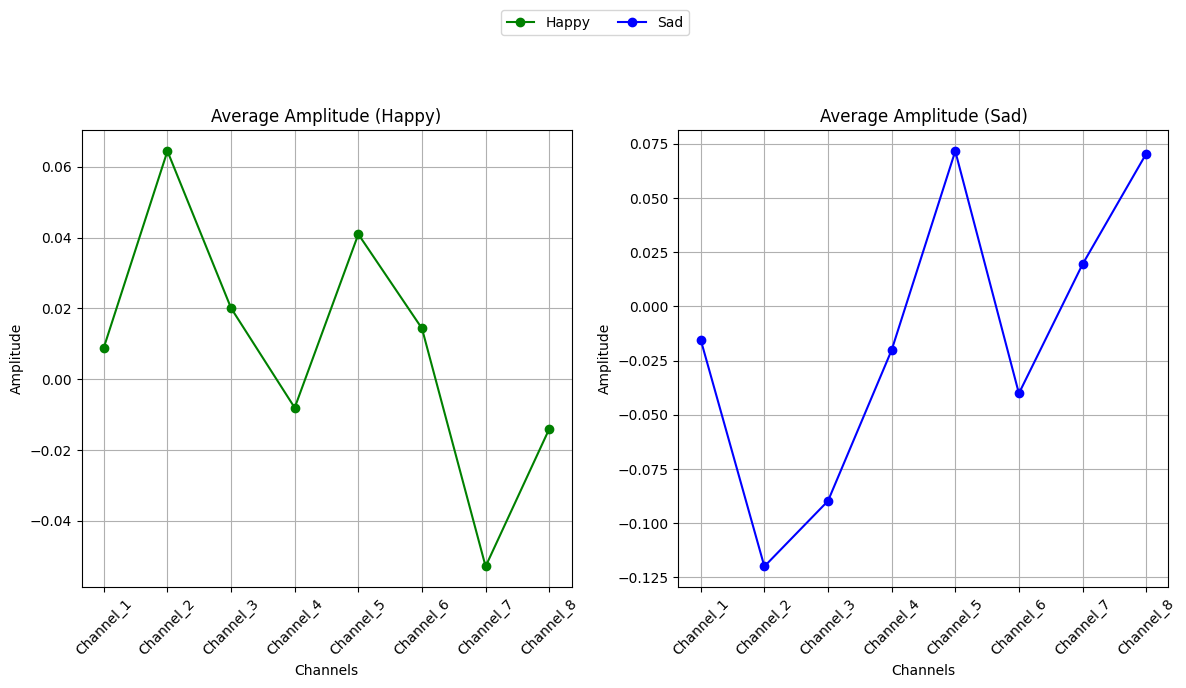

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)

# Simulate brain activity data (e.g., EEG signals)
num_samples = 1000
num_channels = 8
brain_activity = np.random.randn(num_samples, num_channels)

# Simulated emotion labels (e.g., "happy" or "sad")
emotions = np.random.choice(["happy", "sad"], size=num_samples)

# Creating a pandas DataFrame to store the data
data = pd.DataFrame(brain_activity, columns=[f"Channel_{i+1}" for i in range(num_channels)])
data["Emotion"] = emotions

# Exploring the data and computing different features
average_amplitude = data.select_dtypes(include=[np.number]).mean()  # Select numeric columns only
frequency = np.fft.fft(brain_activity)

# Create subplots for happy and sad emotions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Reset index of emotion Series and average_amplitude
happy_emotion_mask = data["Emotion"] == "happy"
happy_data = data.loc[happy_emotion_mask, data.columns[:-1]]

sad_emotion_mask = data["Emotion"] == "sad"
sad_data = data.loc[sad_emotion_mask, data.columns[:-1]]

# Plot average amplitude for happy emotions (green)
axs[0].plot(happy_data.mean(), marker='o', color='green', label='Happy')
axs[0].set_title('Average Amplitude (Happy)')
axs[0].set_xlabel('Channels')
axs[0].set_ylabel('Amplitude')
axs[0].set_xticks(range(num_channels))
axs[0].set_xticklabels(happy_data.columns, rotation=45)
axs[0].grid(True)

# Plot average amplitude for sad emotions (blue)
axs[1].plot(sad_data.mean(), marker='o', color='blue', label='Sad')
axs[1].set_title('Average Amplitude (Sad)')
axs[1].set_xlabel('Channels')
axs[1].set_ylabel('Amplitude')
axs[1].set_xticks(range(num_channels))
axs[1].set_xticklabels(sad_data.columns, rotation=45)
axs[1].grid(True)

# Add a common legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

# Added Frequency Feature of Happy and Sad


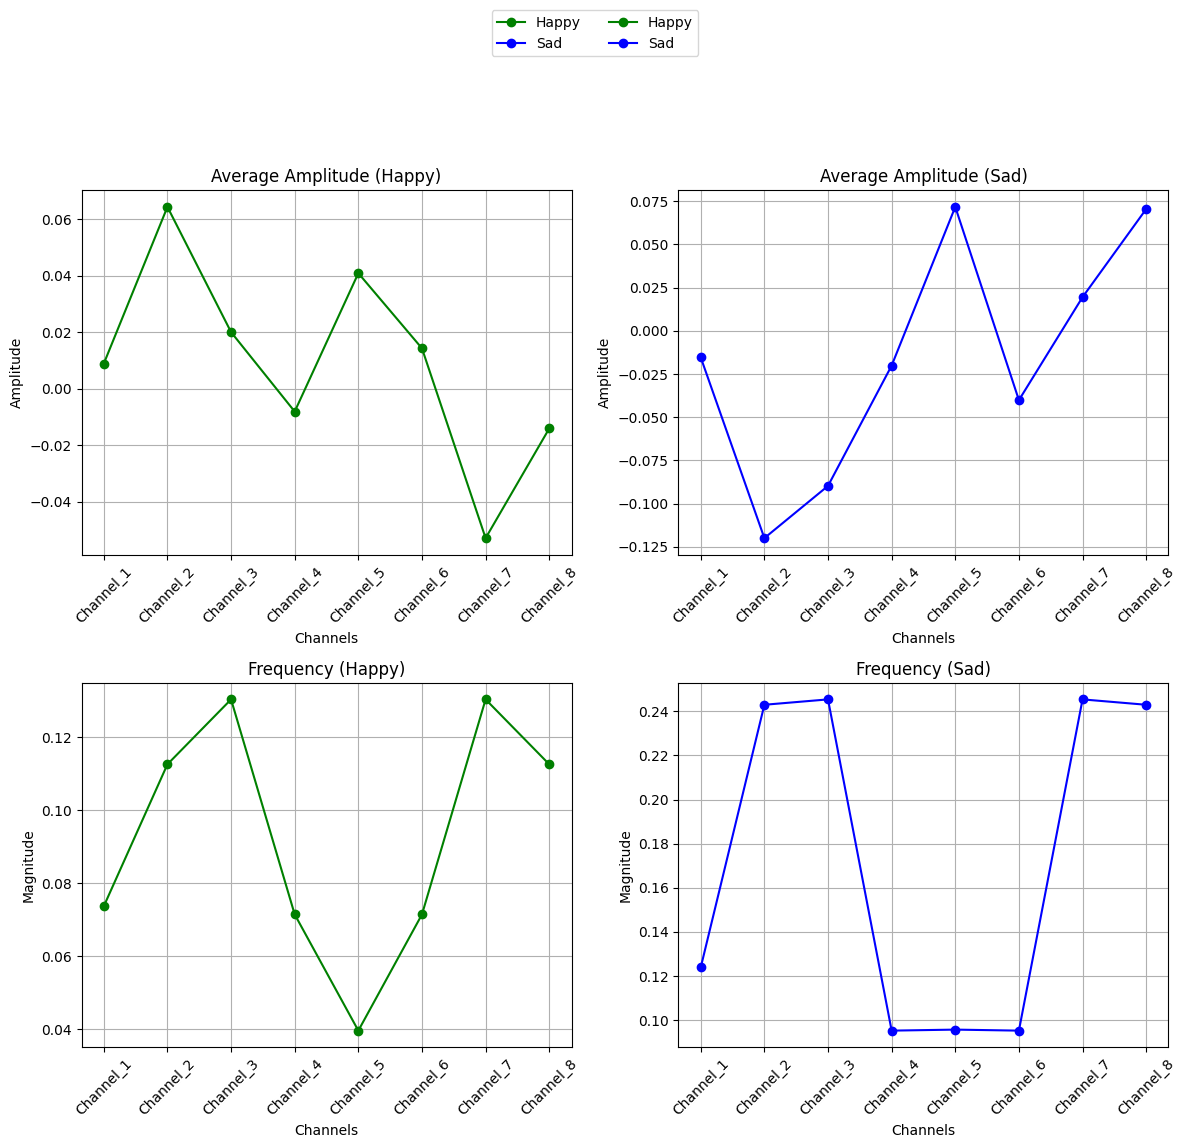

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate brain activity data (e.g., EEG signals)
num_samples = 1000
num_channels = 8
brain_activity = np.random.randn(num_samples, num_channels)

# Simulated emotion labels (e.g., "happy" or "sad")
emotions = np.random.choice(["happy", "sad"], size=num_samples)

# Creating a pandas DataFrame to store the data
data = pd.DataFrame(brain_activity, columns=[f"Channel_{i+1}" for i in range(num_channels)])
data["Emotion"] = emotions

# Exploring the data and computing different features
average_amplitude = data.select_dtypes(include=[np.number]).mean()  # Select numeric columns only
frequency = np.fft.fft(brain_activity)

# Create subplots for happy and sad emotions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Reset index of emotion Series and average_amplitude
happy_emotion_mask = data["Emotion"] == "happy"
happy_data = data.loc[happy_emotion_mask, data.columns[:-1]]

sad_emotion_mask = data["Emotion"] == "sad"
sad_data = data.loc[sad_emotion_mask, data.columns[:-1]]

# Plot average amplitude for happy emotions (green)
axs[0, 0].plot(happy_data.mean(), marker='o', color='green', label='Happy')
axs[0, 0].set_title('Average Amplitude (Happy)')
axs[0, 0].set_xlabel('Channels')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xticks(range(num_channels))
axs[0, 0].set_xticklabels(happy_data.columns, rotation=45)
axs[0, 0].grid(True)

# Plot average amplitude for sad emotions (blue)
axs[0, 1].plot(sad_data.mean(), marker='o', color='blue', label='Sad')
axs[0, 1].set_title('Average Amplitude (Sad)')
axs[0, 1].set_xlabel('Channels')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].set_xticks(range(num_channels))
axs[0, 1].set_xticklabels(sad_data.columns, rotation=45)
axs[0, 1].grid(True)

# Plot frequency for happy emotions
axs[1, 0].plot(np.abs(frequency[happy_emotion_mask].mean(axis=0)), marker='o', color='green', label='Happy')
axs[1, 0].set_title('Frequency (Happy)')
axs[1, 0].set_xlabel('Channels')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].set_xticks(range(num_channels))
axs[1, 0].set_xticklabels(data.columns[:-1], rotation=45)
axs[1, 0].grid(True)

# Plot frequency for sad emotions
axs[1, 1].plot(np.abs(frequency[sad_emotion_mask].mean(axis=0)), marker='o', color='blue', label='Sad')
axs[1, 1].set_title('Frequency (Sad)')
axs[1, 1].set_xlabel('Channels')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xticks(range(num_channels))
axs[1, 1].set_xticklabels(data.columns[:-1], rotation=45)
axs[1, 1].grid(True)

# Add a common legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

# Adding Phase also a Feature for Happy and Sad


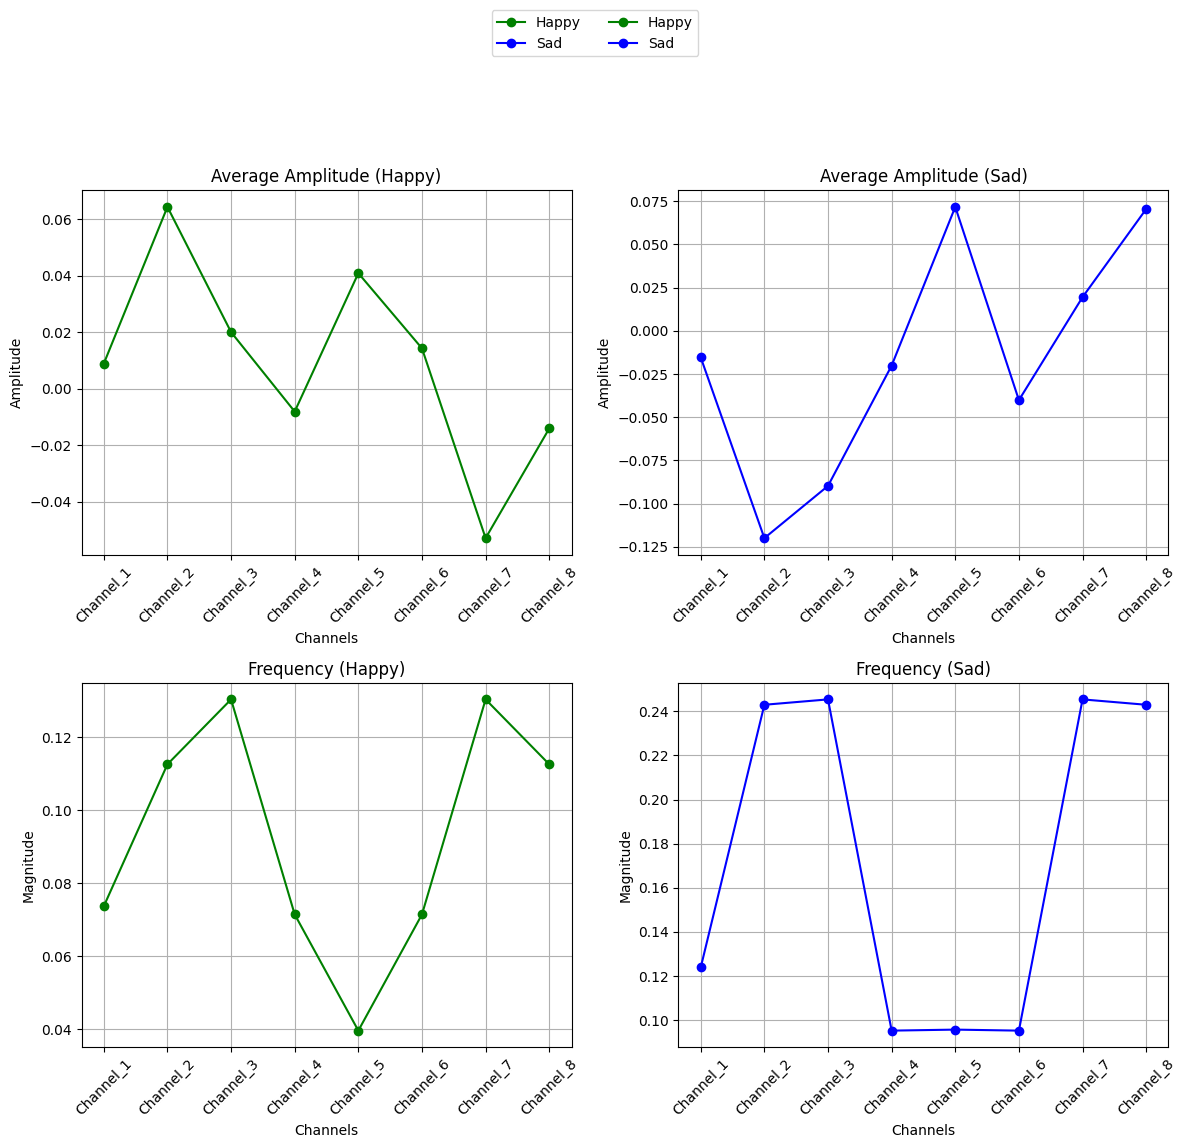

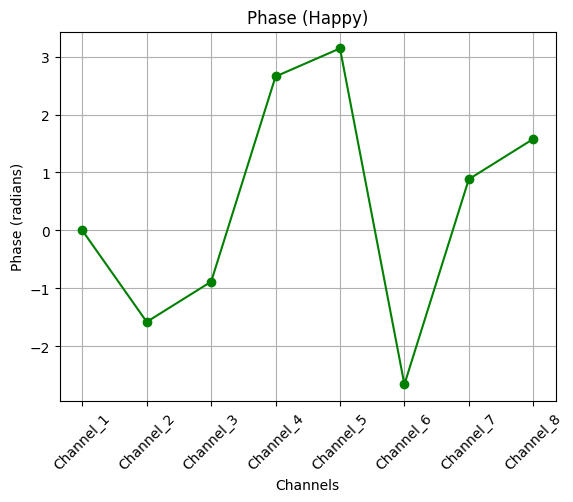

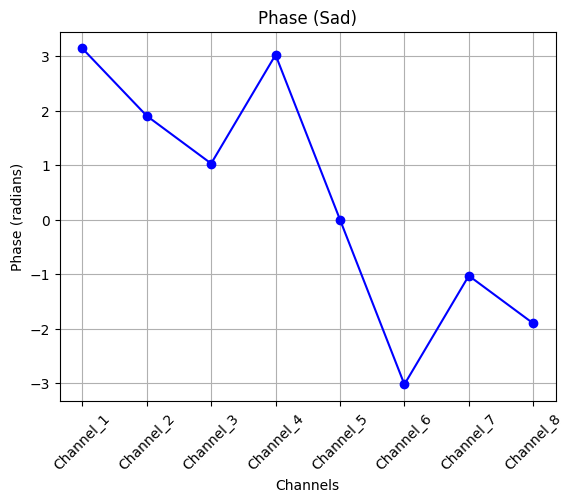

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate brain activity data (e.g., EEG signals)
num_samples = 1000
num_channels = 8
brain_activity = np.random.randn(num_samples, num_channels)

# Simulated emotion labels (e.g., "happy" or "sad")
emotions = np.random.choice(["happy", "sad"], size=num_samples)

# Creating a pandas DataFrame to store the data
data = pd.DataFrame(brain_activity, columns=[f"Channel_{i+1}" for i in range(num_channels)])
data["Emotion"] = emotions

# Exploring the data and computing different features
average_amplitude = data.select_dtypes(include=[np.number]).mean()  # Select numeric columns only
frequency = np.fft.fft(brain_activity)

# Create subplots for happy and sad emotions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Reset index of emotion Series and average_amplitude
happy_emotion_mask = data["Emotion"] == "happy"
happy_data = data.loc[happy_emotion_mask, data.columns[:-1]]

sad_emotion_mask = data["Emotion"] == "sad"
sad_data = data.loc[sad_emotion_mask, data.columns[:-1]]

# Plot average amplitude for happy emotions (green)
axs[0, 0].plot(happy_data.mean(), marker='o', color='green', label='Happy')
axs[0, 0].set_title('Average Amplitude (Happy)')
axs[0, 0].set_xlabel('Channels')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xticks(range(num_channels))
axs[0, 0].set_xticklabels(happy_data.columns, rotation=45)
axs[0, 0].grid(True)

# Plot average amplitude for sad emotions (blue)
axs[0, 1].plot(sad_data.mean(), marker='o', color='blue', label='Sad')
axs[0, 1].set_title('Average Amplitude (Sad)')
axs[0, 1].set_xlabel('Channels')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].set_xticks(range(num_channels))
axs[0, 1].set_xticklabels(sad_data.columns, rotation=45)
axs[0, 1].grid(True)

# Plot frequency for happy emotions
axs[1, 0].plot(np.abs(frequency[happy_emotion_mask].mean(axis=0)), marker='o', color='green', label='Happy')
axs[1, 0].set_title('Frequency (Happy)')
axs[1, 0].set_xlabel('Channels')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].set_xticks(range(num_channels))
axs[1, 0].set_xticklabels(data.columns[:-1], rotation=45)
axs[1, 0].grid(True)

# Plot frequency for sad emotions
axs[1, 1].plot(np.abs(frequency[sad_emotion_mask].mean(axis=0)), marker='o', color='blue', label='Sad')
axs[1, 1].set_title('Frequency (Sad)')
axs[1, 1].set_xlabel('Channels')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xticks(range(num_channels))
axs[1, 1].set_xticklabels(data.columns[:-1], rotation=45)
axs[1, 1].grid(True)

# Add a common legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

# Plot phase for happy emotions
fig, axs = plt.subplots()
axs.plot(np.angle(frequency[happy_emotion_mask].mean(axis=0)), marker='o', color='green', label='Happy')
axs.set_title('Phase (Happy)')
axs.set_xlabel('Channels')
axs.set_ylabel('Phase (radians)')
axs.set_xticks(range(num_channels))

axs.set_xticklabels(data.columns[:-1], rotation=45)
axs.grid(True)

# Plot phase for sad emotions
fig, axs = plt.subplots()
axs.plot(np.angle(frequency[sad_emotion_mask].mean(axis=0)), marker='o', color='blue', label='Sad')
axs.set_title('Phase (Sad)')
axs.set_xlabel('Channels')
axs.set_ylabel('Phase (radians)')
axs.set_xticks(range(num_channels))
axs.set_xticklabels(data.columns[:-1], rotation=45)
axs.grid(True)

# Display the plots
plt.show()


In this updated code, we added two additional plots to visualize the phase feature for happy and sad emotions separately. The phase values are obtained using the `np.angle()` function applied to the frequency data. Each plot shows the phase values for each channel. The x-axis represents the channels, and the y-axis represents the phase in radians.